### 评价指标
- 参考百度百科，对于概念意义的理解有帮助 https://baike.baidu.com/item/ROC%E6%9B%B2%E7%BA%BF/775606?fr=aladdin
- 机器学习之分类器性能指标之ROC曲线、AUC值    https://www.cnblogs.com/dlml/p/4403482.html
- 4.4.2分类模型评判指标（一） - 混淆矩阵(Confusion Matrix)   https://blog.csdn.net/Orange_Spotty_Cat/article/details/80520839
- 准确率（accuracy）、召回率（recall）的意义和区别   https://blog.csdn.net/liu123641191/article/details/80364334

下面是个人的一个理解，方便记忆：

![evaluation](https://raw.githubusercontent.com/LittleSix1/img_hub/master/evaluation/%E8%AF%84%E4%BB%B7%E6%8C%87%E6%A0%87.png)

In [40]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 


#model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# evulatuon
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [51]:
iris = load_iris()
x = iris.data[:,:2] 
y = iris.target
#为了构造一个二分类，将1 2类划分成非0类  
y[np.where(y>0)] = 1
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


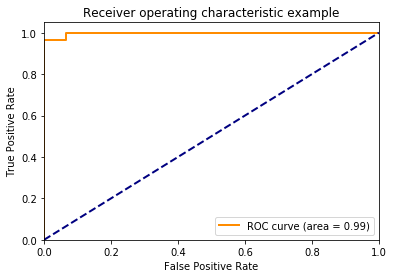

In [60]:
#用单个模型 做ROC曲线

model =SVC(probability=True)
model.fit(x_train,y_train)
test_pred = model.predict_proba(x_test)[:,1]

train_auc = roc_auc_score(y_test,test_pred)
fpr,tpr,ther = roc_curve(y_test,test_pred)

plt.figure()
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % test_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [37]:
models = [LogisticRegression(),SVC(probability=True),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier()]
names = ["LR","SVC", 'DT', "RF","Xgb"]

In [53]:
for name,model in zip(names,models):
    model.fit(x_train,y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    #accuracyff
    train_accuracy = model.score(x_train,y_train)
    test_accuracy = model.score(x_test,y_test)
    #precision   
    train_precision = precision_score(y_train,y_train_pred)
    test_precision = precision_score(y_test,y_test_pred)   
    #recall
    train_recall = recall_score(y_train,y_train_pred)
    test_recall = recall_score(y_test,y_test_pred)   
    #f1
    train_f1 = f1_score(y_train,y_train_pred)
    test_f1 = f1_score(y_test,y_test_pred)   
    #auc 计算时，计算的应该是不同的概率画出来的曲线下的面积,而不是预测值对应的曲线下的面积
    #预测值 分类模型，应该全是0 或者 1 ，但是概率是类似于得分一样的值
    #根据资料貌似两种都行，都可以作为阈值来进行ROC曲线的绘制
    y_train_pred = model.predict_proba(x_train)[:,1]
    y_test_pred = model.predict_proba(x_test)[:,1]
    
    train_auc = roc_auc_score(y_train,y_train_pred)
    test_auc = roc_auc_score(y_test,y_test_pred)
    print('{}  训练集： accuracy:{:.3},precision:{:.3}, recall:{:.3}, f1:{:.3}, auc:{:.3}'.format(name,train_accuracy,train_precision,train_recall,train_f1,train_auc))
    print('{}  测试集： accuracy:{:.3},precision:{:.3}, recall:{:.3}, f1:{:.3}, auc:{:.3}'.format(name,test_accuracy,test_precision,test_recall,test_f1,test_auc))
    print('\n')

LR  训练集： accuracy:0.99,precision:0.985, recall:1.0, f1:0.993, auc:0.999
LR  测试集： accuracy:1.0,precision:1.0, recall:1.0, f1:1.0, auc:1.0


SVC  训练集： accuracy:1.0,precision:1.0, recall:1.0, f1:1.0, auc:1.0
SVC  测试集： accuracy:1.0,precision:1.0, recall:1.0, f1:1.0, auc:1.0


DT  训练集： accuracy:1.0,precision:1.0, recall:1.0, f1:1.0, auc:1.0
DT  测试集： accuracy:0.956,precision:0.97, recall:0.97, f1:0.97, auc:0.943


RF  训练集： accuracy:0.99,precision:1.0, recall:0.985, f1:0.992, auc:1.0
RF  测试集： accuracy:0.911,precision:1.0, recall:0.879, f1:0.935, auc:1.0


Xgb  训练集： accuracy:0.99,precision:0.985, recall:1.0, f1:0.993, auc:1.0
Xgb  测试集： accuracy:0.956,precision:0.97, recall:0.97, f1:0.97, auc:0.995




D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [58]:
def draw_roc_curve(train_pre_proba,test_pre_proba,train_auc,test_auc,name):
    fpr,tpr,roc_auc = train_pre_proba
    test_fpr,test_tpr,test_roc_auc = test_pre_proba
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % train_auc)
    plt.plot(test_fpr, test_tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' %test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC example '+name)
    plt.legend(loc="lower right")
    plt.show()

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


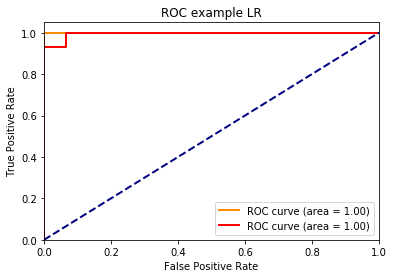

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


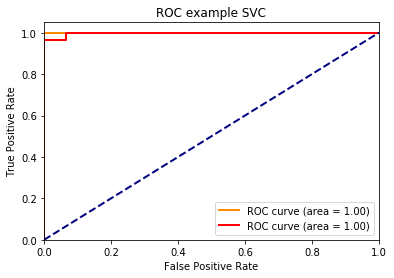

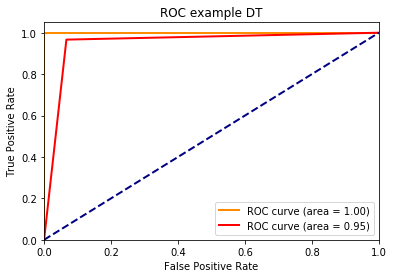

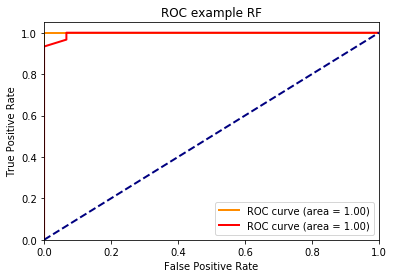

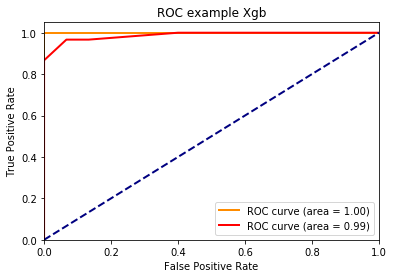

In [59]:
for name,model in zip(names,models):

    model.fit(x_train,y_train)     
    y_train_pred = model.predict_proba(x_train)[:,1]
    y_test_pred = model.predict_proba(x_test)[:,1]


    train_roc = roc_curve(y_train,y_train_pred)
    test_roc = roc_curve(y_test,y_test_pred)

    train_auc = roc_auc_score(y_train,y_train_pred)
    test_auc = roc_auc_score(y_test,y_test_pred)
    


    draw_roc_curve(train_roc,test_roc,train_auc,test_auc,name)
